<a href="https://colab.research.google.com/github/parthu-333/Population-vs-Profits/blob/main/Population_vs_Profits.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Linear Regression**

1. Packages

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import copy
import math
%matplotlib inline

2. Load the dataset

In [3]:
df = pd.read_csv("/content/ex1data1.txt")
columns = {col: df[col].to_numpy() for col in df.columns}
x_train = columns[df.columns[0]]
y_train = columns[df.columns[1]]

3. First five elements

In [4]:
print("First five elements of x_train are :\n",x_train[:5])
print("First five elements of y_train are :\n",y_train[:5])
print("Number of training exmples (m): ",len(x_train))

First five elements of x_train are :
 [5.5277 8.5186 7.0032 5.8598 8.3829]
First five elements of y_train are :
 [ 9.1302 13.662  11.854   6.8233 11.886 ]
Number of training exmples (m):  96


# New Section

4. Visualizing the data

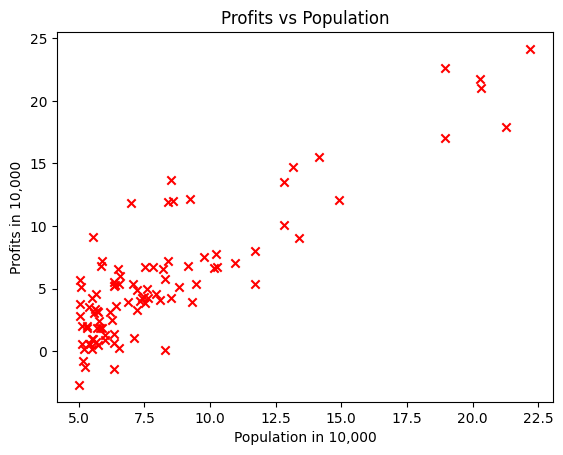

In [5]:
plt.scatter(x_train,y_train,marker='x',c='r')
plt.title("Profits vs Population")
plt.ylabel("Profits in 10,000")
plt.xlabel("Population in 10,000")
plt.show()

5. Compute cost

In [6]:
def compute_cost(x,y,w,b):
  #Number of training examples
  m = x.shape[0]
  total_cost = 0
  cost_sum = 0
  for i in range(m):
    f_wb = w*x[i]+b
    cost = (f_wb - y[i])**2
    cost_sum = cost_sum + cost
  total_cost = (cost_sum)/(2*m)
  return total_cost

6. Compute Gradient

In [7]:
def compute_gradient(x,y,w,b):
  #Number of training examples
  m = x.shape[0]
  #Return variables at last
  dj_dw = 0
  dj_db = 0
  for i in range(m):
    f_wb = w*x[i]+b
    dj_dw = dj_dw+(f_wb - y[i])*x[i]
    dj_db = dj_db + (f_wb - y[i])
  dj_dw = dj_dw/m
  dj_db = dj_db/m
  return dj_dw,dj_db

7. Gradient descent

In [8]:
def gradient_descent(x, y, w_in, b_in, cost_function, gradient_function, alpha, num_iters):

    # number of training examples
    m = len(x)

    # An array to store cost J and w's at each iteration — primarily for graphing later
    J_history = []
    w_history = []
    w = copy.deepcopy(w_in)  #avoid modifying global w within function
    b = b_in

    for i in range(num_iters):

        # Calculate the gradient and update the parameters
        dj_dw, dj_db = compute_gradient(x, y, w, b )

        # Update Parameters using w, b, alpha and gradient
        w = w - alpha * dj_dw
        b = b - alpha * dj_db

        # Save cost J at each iteration
        if i<100000:      # prevent resource exhaustion
            cost =  compute_cost(x, y, w, b)
            J_history.append(cost)

        # Print cost every at intervals 10 times or as many iterations if < 10
        if i% math.ceil(num_iters/10) == 0:
            w_history.append(w)
            print(f"Iteration {i:4}: Cost {float(J_history[-1]):8.2f}   ")

    return w, b, J_history, w_history #return w and J,w history for graphing

In [9]:
initial_w = 0.
initial_b = 0.

# some gradient descent settings
iterations = 1500
alpha = 0.01

w,b,_,_ = gradient_descent(x_train ,y_train, initial_w, initial_b,
                     compute_cost, compute_gradient, alpha, iterations)
print("w,b found by gradient descent:", w, b)

Iteration    0: Cost     5.90   
Iteration  150: Cost     4.43   
Iteration  300: Cost     4.02   
Iteration  450: Cost     3.79   
Iteration  600: Cost     3.65   
Iteration  750: Cost     3.57   
Iteration  900: Cost     3.52   
Iteration 1050: Cost     3.50   
Iteration 1200: Cost     3.48   
Iteration 1350: Cost     3.47   
w,b found by gradient descent: 1.1849957023502022 -3.926439005456633


8. Predicted values

In [10]:
m = x_train.shape[0]
predicted = np.zeros(m)
for i in range(m):
  predicted[i] = w*x_train[i]+b

9. Plotting linear fit

Text(0.5, 0, 'Population in 10,000s')

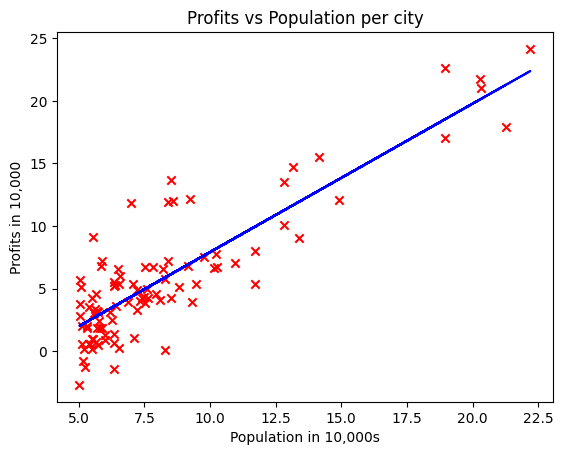

In [11]:
plt.plot(x_train,predicted,c="b")
plt.scatter(x_train,y_train,marker='x',c='r')
plt.title("Profits vs Population per city")
plt.ylabel("Profits in 10,000")
plt.xlabel("Population in 10,000s")


9. Ready to make prediction

In [12]:
profit1 = 3.5*w+b
print('For population 35,000, predicted profit is : $%.2f'%(profit1*10000))
profit2 = 7.5*w+b
print('For population 75,000, predicted profit is : $%.2f'%(profit2*10000))


For population 35,000, predicted profit is : $2210.46
For population 75,000, predicted profit is : $49610.29
